<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# Imports
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [2]:
# Load Boton housing dataset
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
# Scale Date
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [5]:
X_train.shape

(404, 13)

In [0]:
# Model
model = Sequential()
model.add(Dense(10, input_dim = 13, activation='relu'))
model.add(Dense(1))

In [0]:
# Compile Model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 577.6794 - mse: 579.2416
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 573.8351 - mse: 573.9460
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 561.9232 - mse: 568.6267
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 559.2126 - mse: 563.2057
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 555.7304 - mse: 557.4097
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 555.2103 - mse: 551.1860
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 541.0121 - mse: 544.3887
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 533.7747 - mse: 536.8962
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 530.0792 - mse: 528.8186
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 516.2645 - mse: 520.2433
Epoch 11/100
13/13 

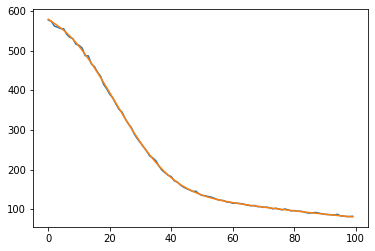

In [8]:
# Fit Model
from matplotlib import pyplot

history = model.fit(X_train, y_train, epochs=100)

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['mse'])
pyplot.show()

In [9]:
# Evaluate Model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 104.3302 - mse: 87.3051


[104.33016204833984, 87.3050537109375]

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_test)

In [12]:
mean_squared_error(y_test,y_pred)

40.60145446671504

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [13]:
# Load data
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
X_train = x_train.astype('float32') / 255.
X_test = x_test.astype('float32') /255.

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
# Encode data
from tensorflow.keras import utils
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [0]:
# Model
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.05, patience=3)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation='relu'),
    Dropout(.2),
    Dense(10, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax') # multiclass classifiaction
]) 

In [0]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Model
model.fit(X_train, y_train, epochs=999)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.7213 - accuracy: 0.7355
Epoch 973/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7251 - accuracy: 0.7326
Epoch 974/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7219 - accuracy: 0.7350
Epoch 975/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7231 - accuracy: 0.7340
Epoch 976/999
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7302 - accuracy: 0.7316
Epoch 977/999
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7209 - accuracy: 0.7331
Epoch 978/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7262 - accuracy: 0.7352
Epoch 979/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7215 - accuracy: 0.7328
Epoch 980/999
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7257 - accuracy: 0.7339
Epoch 981/999
1875/1875 [==============================] - 3s 1ms/ste

In [0]:
# Evaluate Model
model.evaluate(X_test,y_test)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.